In [95]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import matplotlib.animation as animation
import glob, re, os
import pandas as pd
import seaborn as sns


import scienceplots
plt.style.use('default')
plt.style.use(['science', 'ieee','high-vis', 'grid'])



%matplotlib inline

In [108]:
# print rc params
for key, item in plt.rcParams.items():
    print(key, item)
plt.rcParams['figure.dpi'] = 300

_internal.classic_mode False
agg.path.chunksize 0
animation.bitrate -1
animation.codec h264
animation.convert_args []
animation.convert_path convert
animation.embed_limit 20.0
animation.ffmpeg_args []
animation.ffmpeg_path ffmpeg
animation.frame_format png
animation.html none
animation.writer ffmpeg
axes.autolimit_mode data
axes.axisbelow True
axes.edgecolor black
axes.facecolor white
axes.formatter.limits [-5, 6]
axes.formatter.min_exponent 0
axes.formatter.offset_threshold 4
axes.formatter.use_locale False
axes.formatter.use_mathtext False
axes.formatter.useoffset True
axes.grid True
axes.grid.axis both
axes.grid.which major
axes.labelcolor black
axes.labelpad 4.0
axes.labelsize medium
axes.labelweight normal
axes.linewidth 0.5
axes.prop_cycle (cycler('color', ['#0d49fb', '#e6091c', '#26eb47', '#8936df', '#fec32d', '#25d7fd']) + cycler('linestyle', ['-', '--', '-.', ':', '-', '--']))
axes.spines.bottom True
axes.spines.left True
axes.spines.right True
axes.spines.top True
axes.titlec

In [109]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [110]:
dataset_path_dir = "../../build/DATASET_COMPLEX_SPAD/"
list_of_files = glob.glob(dataset_path_dir + "*.csv")
latest_file = max(list_of_files, key=os.path.getctime)
dataset_path = latest_file
print("Dataset path: ", dataset_path)
df = pd.read_csv(dataset_path, sep=",", header=0)

Dataset path:  ../../build/DATASET_COMPLEX_SPAD/dataset_complex_2023-03-17_17-33-10.csv


In [111]:
idx_BV = df.columns.get_loc("BreakdownVoltage")
idxBrP = idx_BV + 1
idxDW = idx_BV + 2
idxDoping = np.arange(2, idx_BV, 1)
NbDoping = len(idxDoping)
print("NbDoping: ", NbDoping)

df.dropna()
df.tail()

NbDoping:  200


,TotalLength,DonorLength,Donor_0,Donor_1,Donor_2,Donor_3,Donor_4,Donor_5,Donor_6,Donor_7,...,Acceptors_93,Acceptors_94,Acceptors_95,Acceptors_96,Acceptors_97,Acceptors_98,Acceptors_99,BreakdownVoltage,BreakdownProbability,DepletionWidth
4792,8.0,2.838,4.289000e+19,4.289000e+19,4.289000e+19,4.289000e+19,4.289000e+19,4.289000e+19,4.289000e+19,4.289000e+19,...,4.463000e+16,4.320000e+16,4.182000e+16,4.048000e+16,3.919000e+16,3.794000e+16,3.672000e+16,13.495,0.637,0.322
4793,8.0,1.325,1.083000e+17,1.083000e+17,1.083000e+17,1.083000e+17,1.083000e+17,1.083000e+17,1.083000e+17,1.083000e+17,...,7.108000e+17,7.486000e+17,7.883000e+17,8.301000e+17,8.742000e+17,9.205000e+17,9.694000e+17,21.405,0.619,0.683
4794,8.0,2.829,2.230000e+17,2.230000e+17,2.230000e+17,2.230000e+17,2.230000e+17,2.230000e+17,2.230000e+17,2.230000e+17,...,1.267000e+17,8.646000e+16,5.899000e+16,4.024000e+16,2.746000e+16,1.873000e+16,1.278000e+16,11.866,0.673,0.281
4795,8.0,2.775,7.737000e+18,7.737000e+18,7.737000e+18,7.737000e+18,7.737000e+18,7.737000e+18,7.737000e+18,7.737000e+18,...,1.319000e+18,9.412000e+17,6.715000e+17,4.791000e+17,3.418000e+17,2.438000e+17,1.740000e+17,9.772,0.718,0.161
4796,8.0,3.534,1.229000e+16,1.229000e+16,1.229000e+16,1.229000e+16,1.229000e+16,1.229000e+16,1.229000e+16,1.229000e+16,...,6.915000e+17,1.156000e+18,1.934000e+18,3.233000e+18,5.407000e+18,9.042000e+18,1.512000e+19,49.326,0.449,2.304


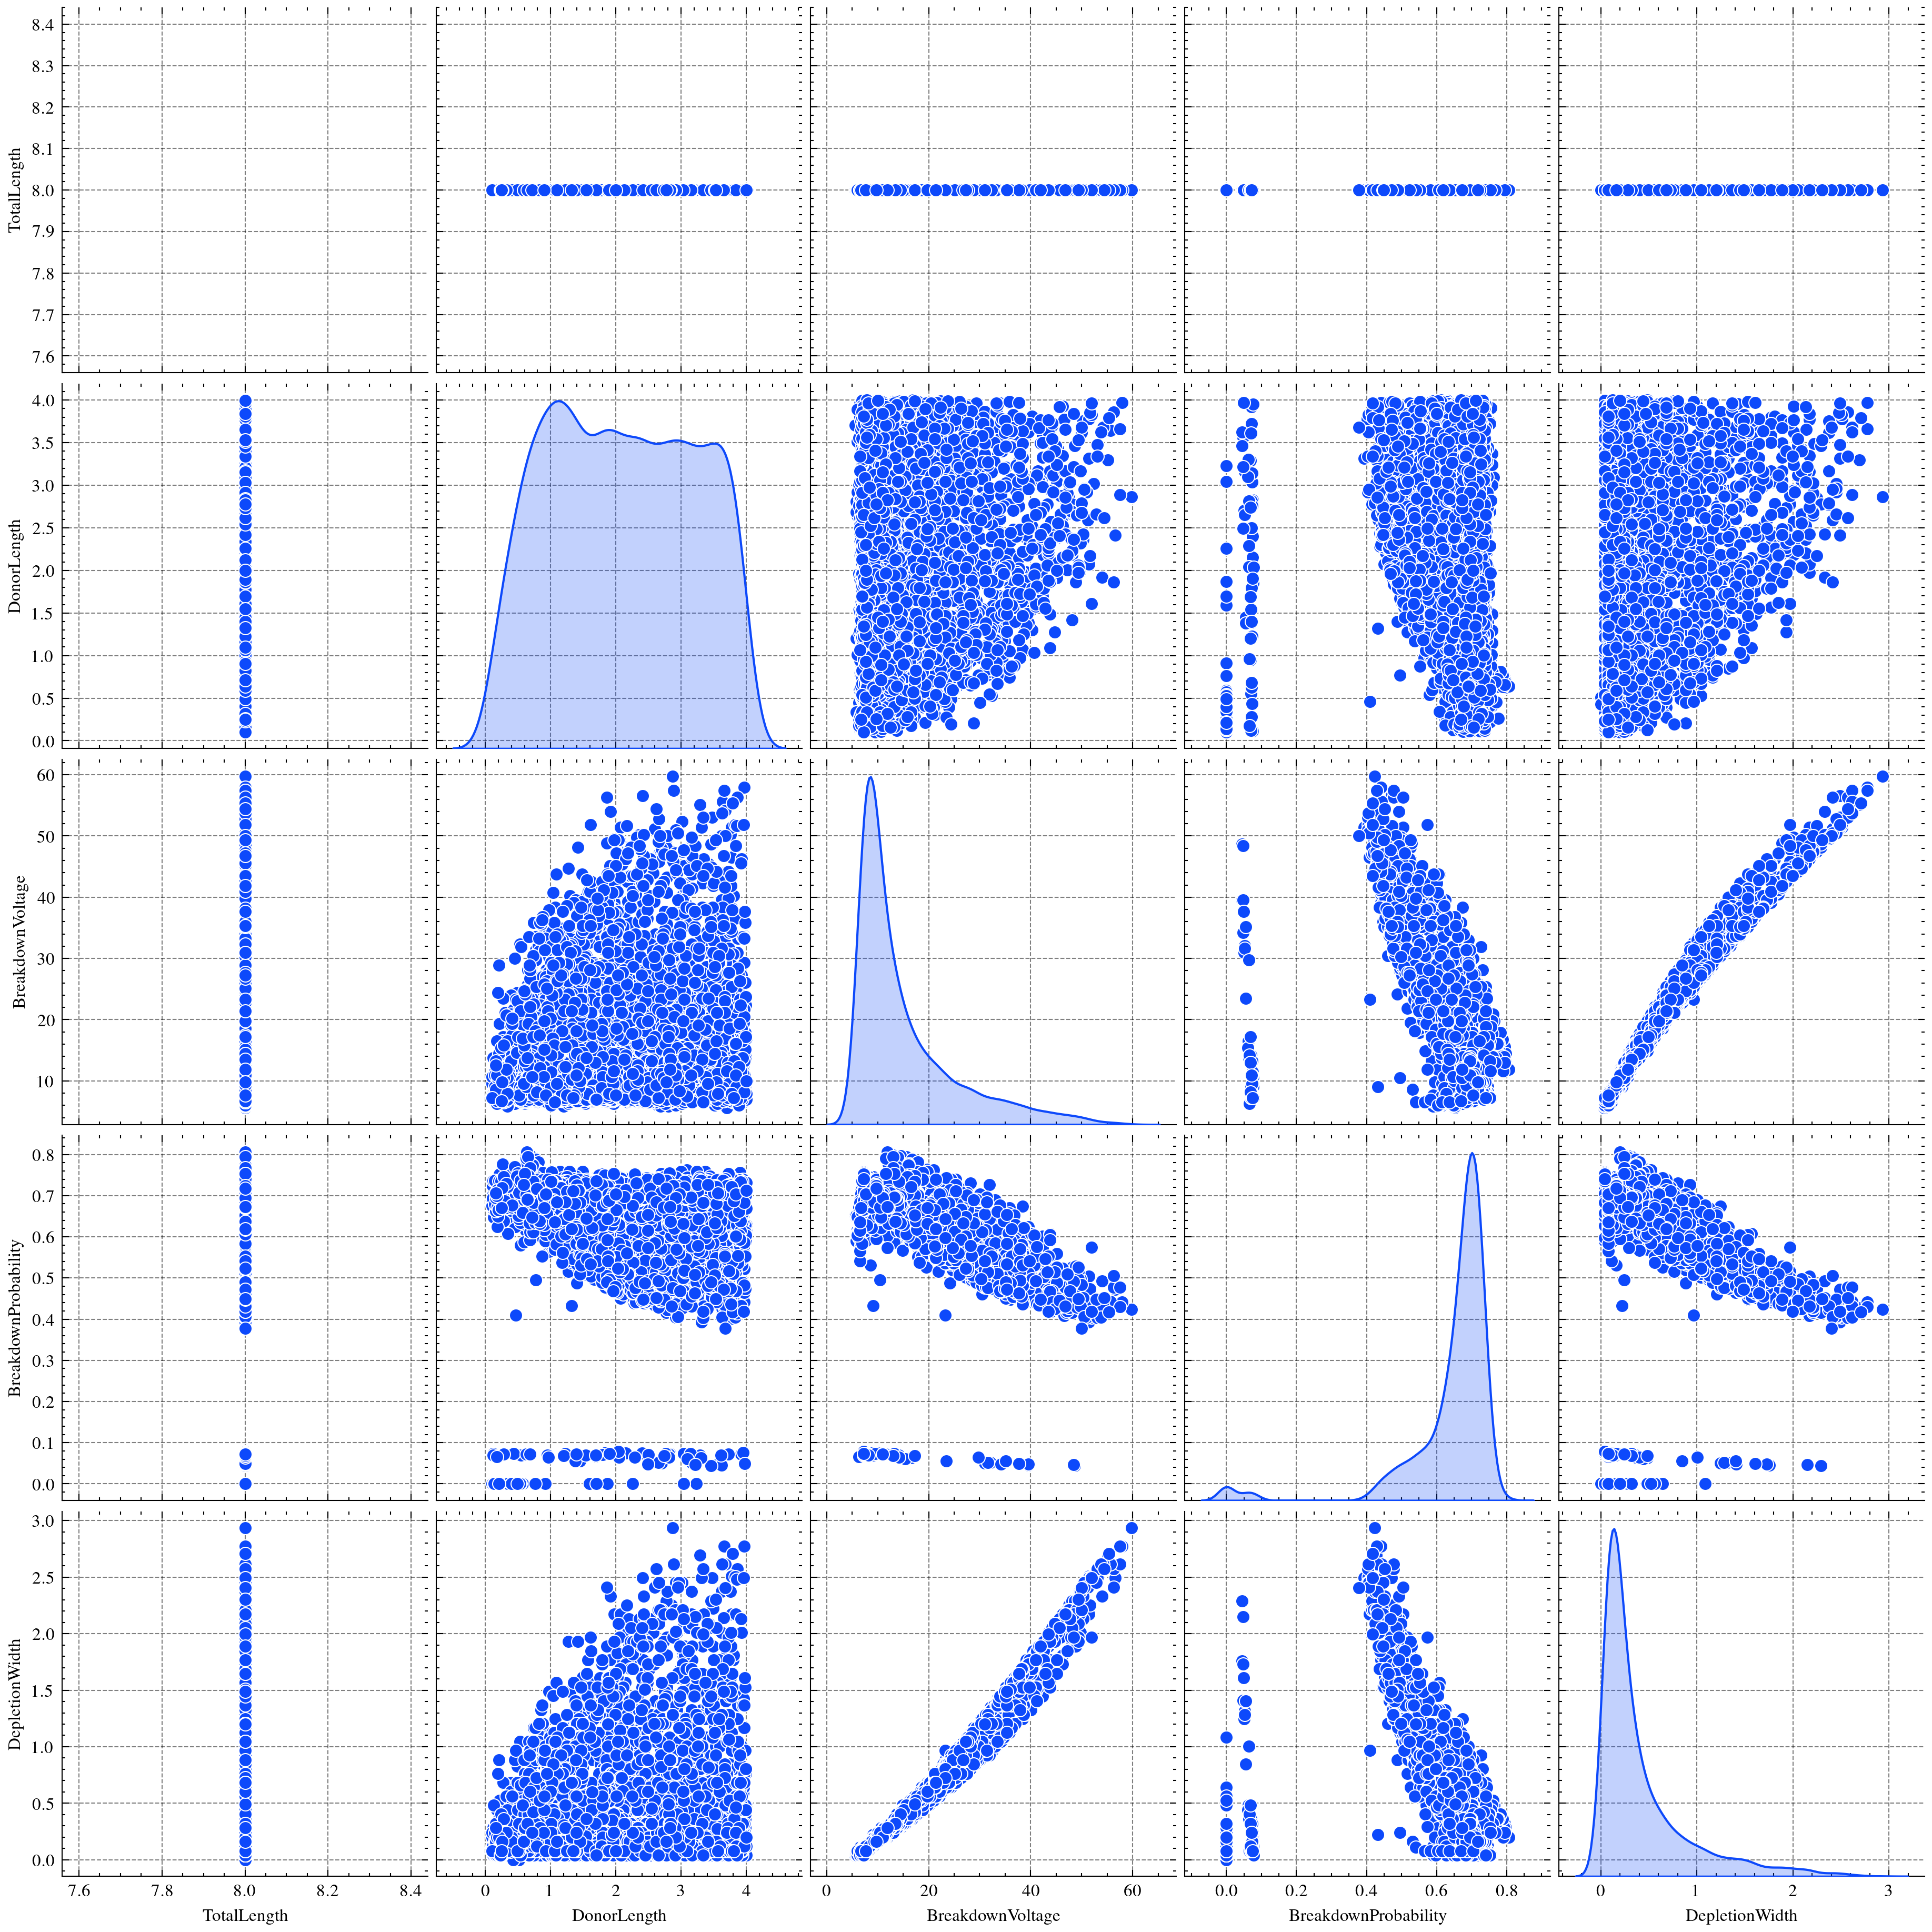

In [112]:
pp = sns.pairplot(df[["TotalLength", "DonorLength", "BreakdownVoltage", "BreakdownProbability", "DepletionWidth"]], diag_kind="kde")
plt.show()

(4797, 100)
(4797, 100)
(4797, 100)
NbPartPlot:  16


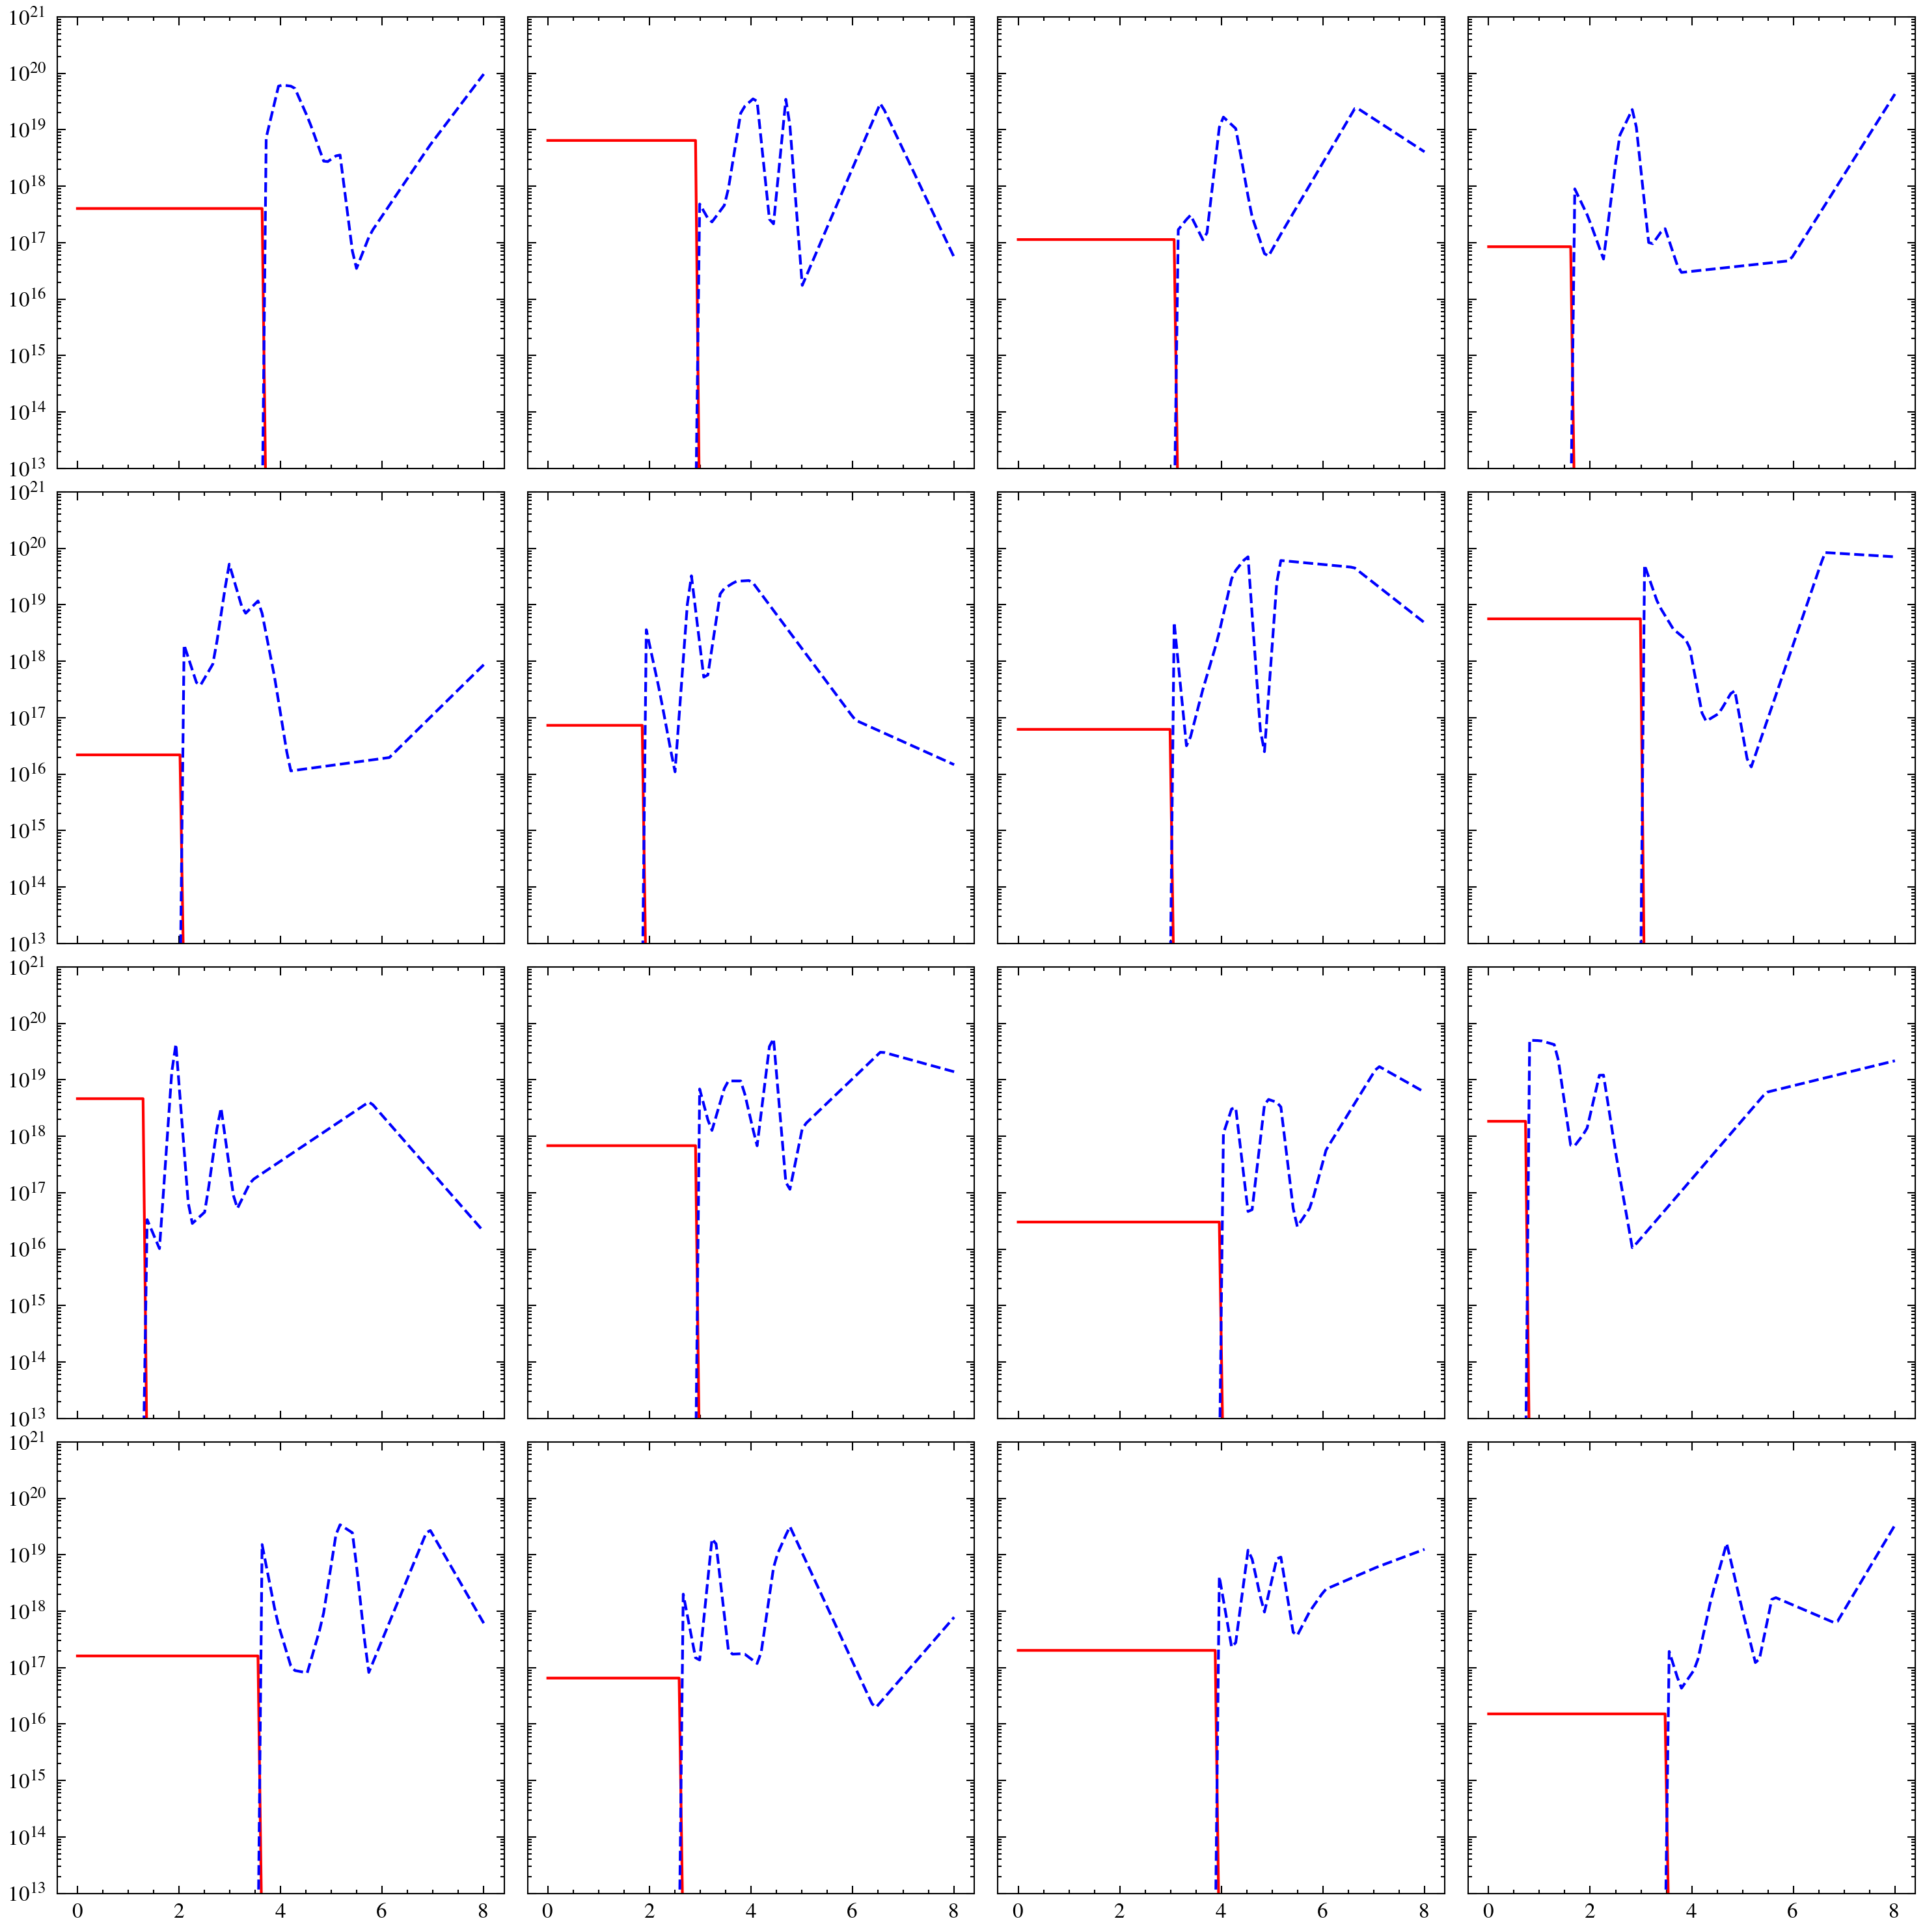

In [113]:
NbPart = len(df)
TotalLength = df["TotalLength"].to_numpy()

Acceptors = df[df.iloc[:, 2:idx_BV//2+1].columns].to_numpy()
Donors = df[df.iloc[:, idx_BV//2+1:idx_BV].columns].to_numpy()
print(Acceptors.shape)
print(Donors.shape)
NetDoping = Donors - Acceptors
print(NetDoping.shape)


NXY = 4
iter0 = 0
fig, axs = plt.subplots(NXY, NXY, sharex=True, sharey=True, figsize=(10, 10))


for ax_ in axs.flat:
    ax_.set_yscale('log')
    # ax_.set_xticklabels([])
    # ax_.set_yticklabels([])
    ax_.grid()

cmap = plt.get_cmap('jet')
NbPartPlot = min(NXY*NXY, NbPart)
print("NbPartPlot: ", NbPartPlot)
for i in range(NbPartPlot):
    X = np.linspace(0, TotalLength[i], NbDoping//2)
    p = i % NXY
    q = i // NXY
    c = cmap(np.random.rand())
    axs[p, q].plot(X, Acceptors[i, :], color='r')
    axs[p, q].plot(X, Donors[i, :], color='b')
    axs[p, q].set_ylim(1e13, 1e21)

fig.tight_layout()
plt.show()
# fig.savefig("MC_Sampling_DopingProfile_Fancy.png", dpi=300)
# fig.savefig("MC_Sampling_DopingProfile_Fancy.pdf", dpi=300)

(4797, 100)
(4797, 100)
(4797, 100)
NbPartPlot:  100


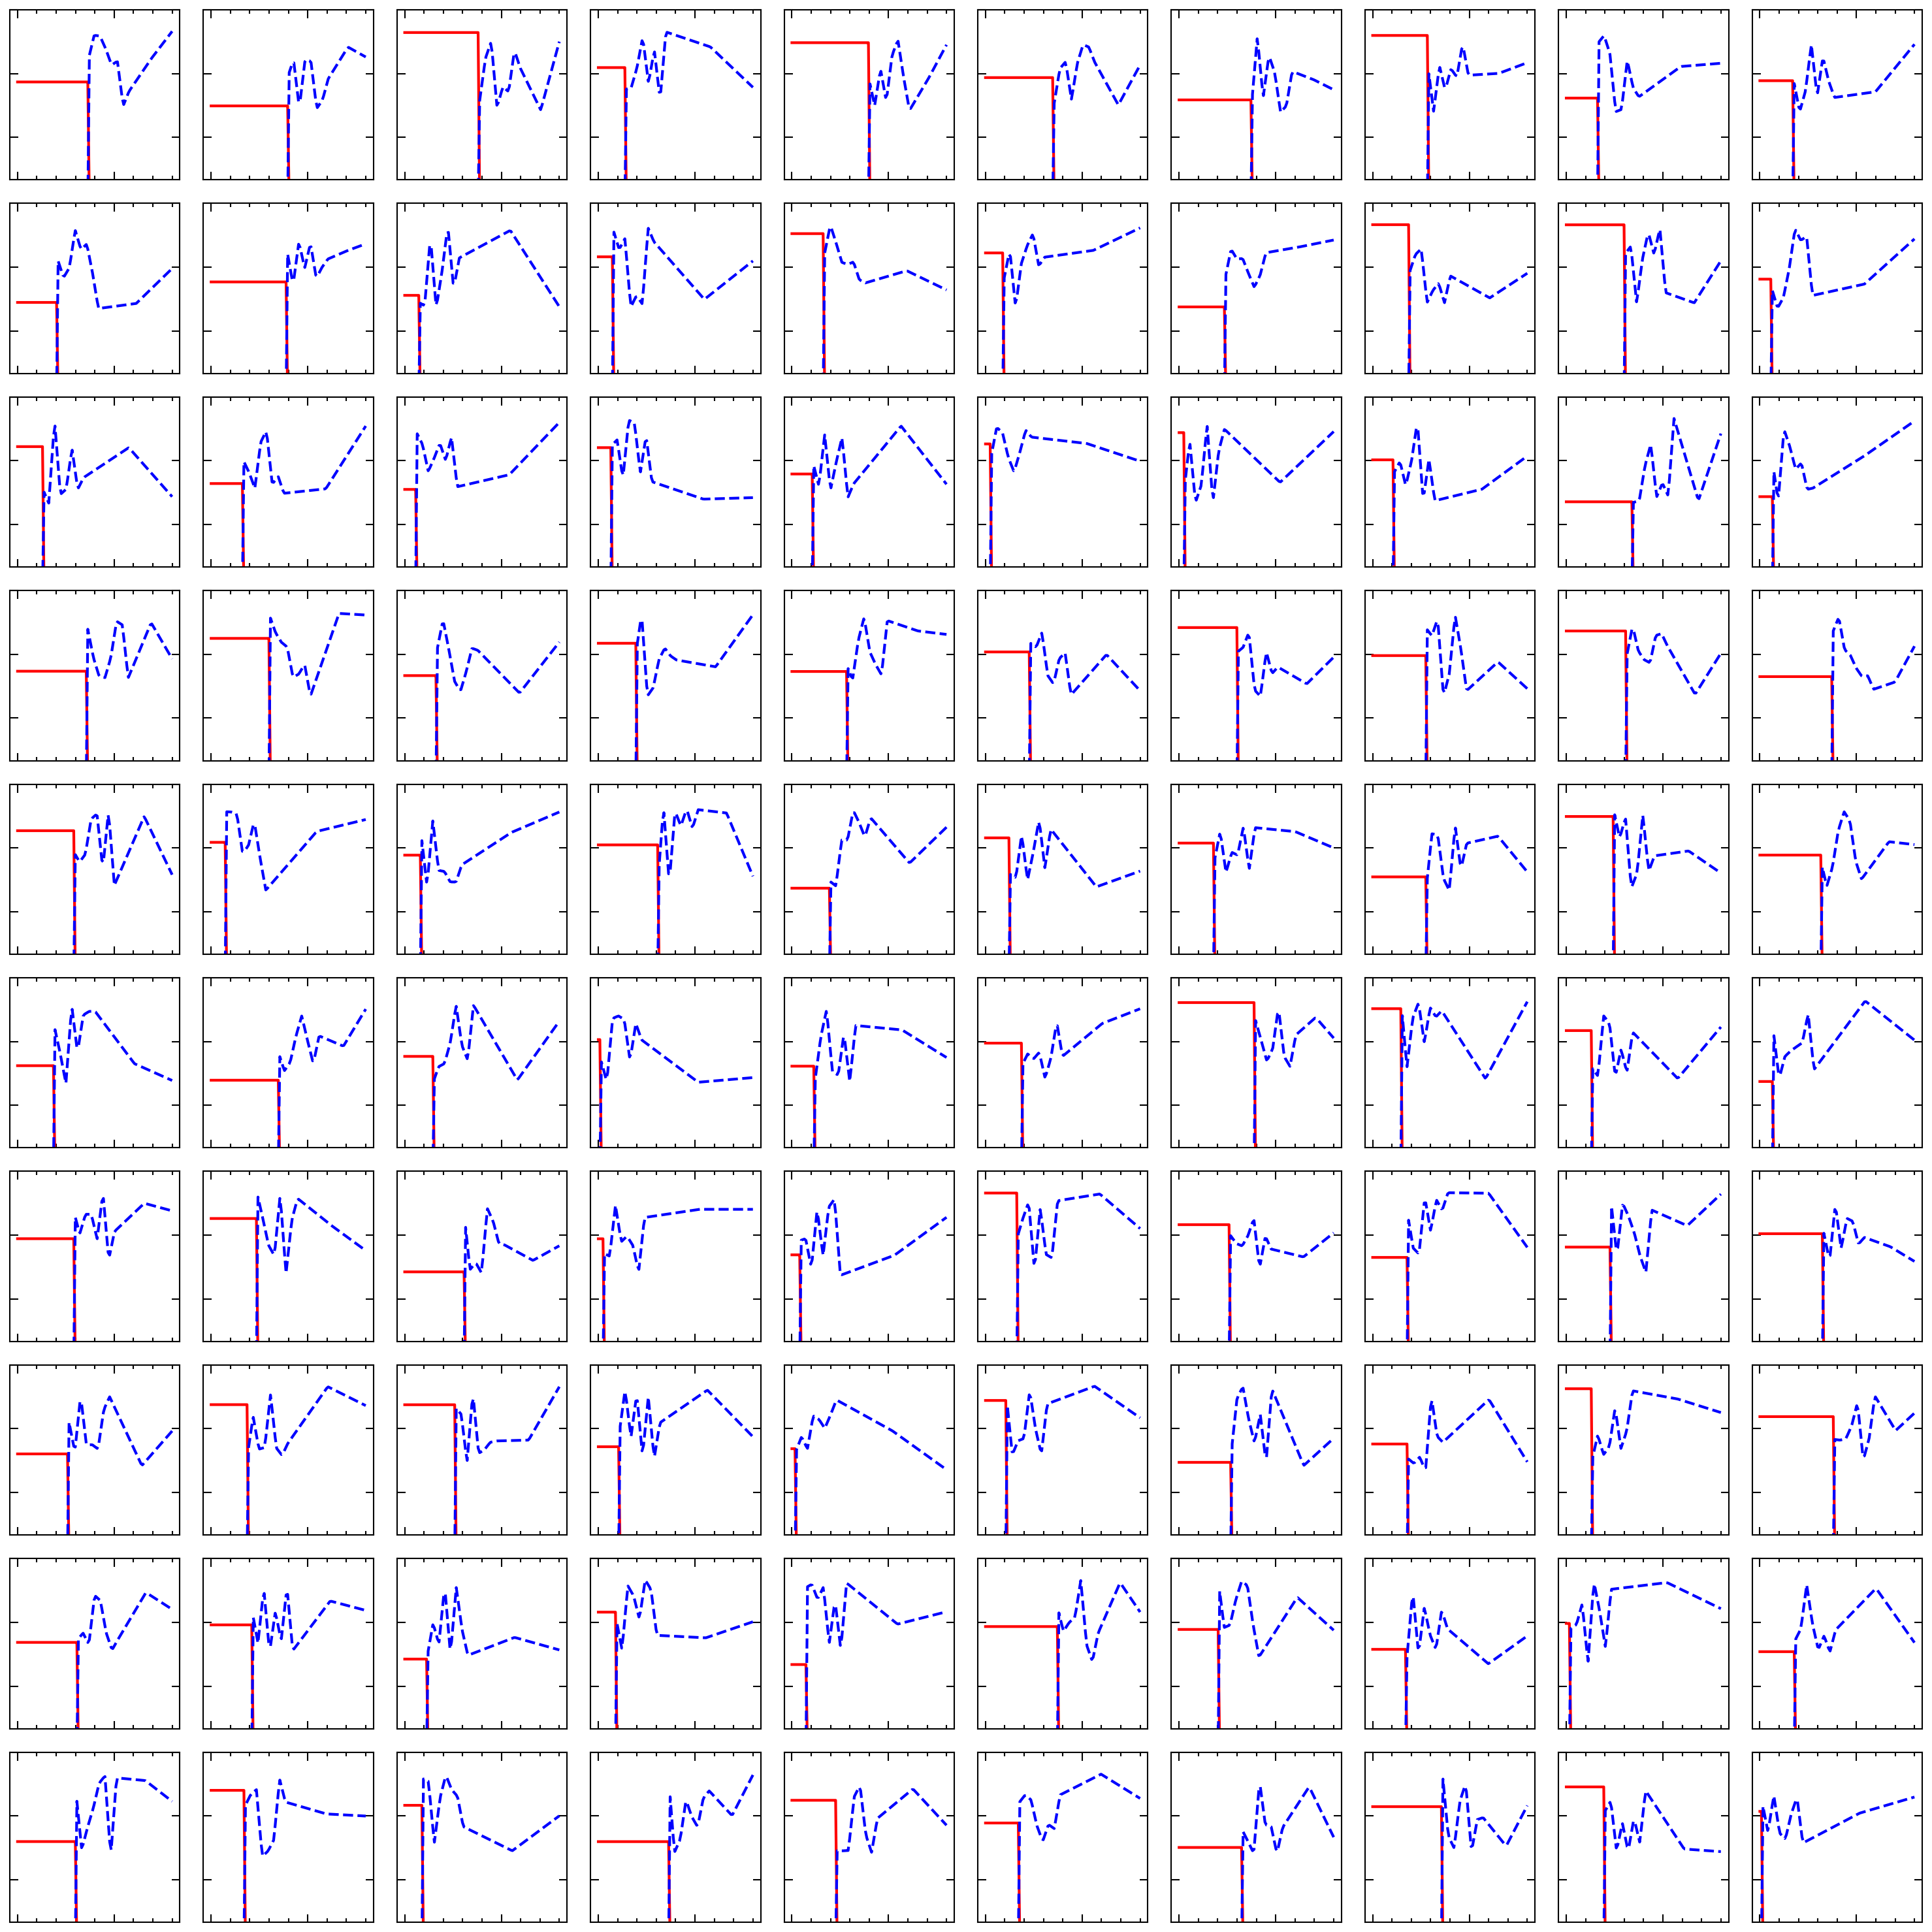

In [114]:
NbPart = len(df)
TotalLength = df["TotalLength"].to_numpy()

Acceptors = df[df.iloc[:, 2:idx_BV//2+1].columns].to_numpy()
Donors = df[df.iloc[:, idx_BV//2+1:idx_BV].columns].to_numpy()
print(Acceptors.shape)
print(Donors.shape)
NetDoping = Donors - Acceptors
print(NetDoping.shape)


NXY = 10
iter0 = 0
fig, axs = plt.subplots(NXY, NXY, sharex=True, sharey=True, figsize=(10, 10))


for ax_ in axs.flat:
    ax_.set_yscale('log')
    ax_.set_xticklabels([])
    ax_.set_yticklabels([])
    ax_.grid()

cmap = plt.get_cmap('jet')
NbPartPlot = min(NXY*NXY, NbPart)
print("NbPartPlot: ", NbPartPlot)
for i in range(NbPartPlot):
    X = np.linspace(0, TotalLength[i], NbDoping//2)
    p = i % NXY
    q = i // NXY
    c = cmap(np.random.rand())
    axs[p, q].plot(X, Acceptors[i, :], color='r')
    axs[p, q].plot(X, Donors[i, :], color='b')
    axs[p, q].set_ylim(1e13, 1e21)

fig.tight_layout()
plt.show()
# fig.savefig("MC_Sampling_DopingProfile_Fancy.png", dpi=300)
# fig.savefig("MC_Sampling_DopingProfile_Fancy.pdf", dpi=300)

In [115]:
TotalLength = df["TotalLength"].to_numpy()
DonorLength = df["DonorLength"].to_numpy()
BreakdownVoltage = df["BreakdownVoltage"].to_numpy()
BreakdownProbability = df["BreakdownProbability"].to_numpy()
DepletionWidth = df["DepletionWidth"].to_numpy()


Text(0, 0.5, 'Depletion Width ($\\mu$m)')

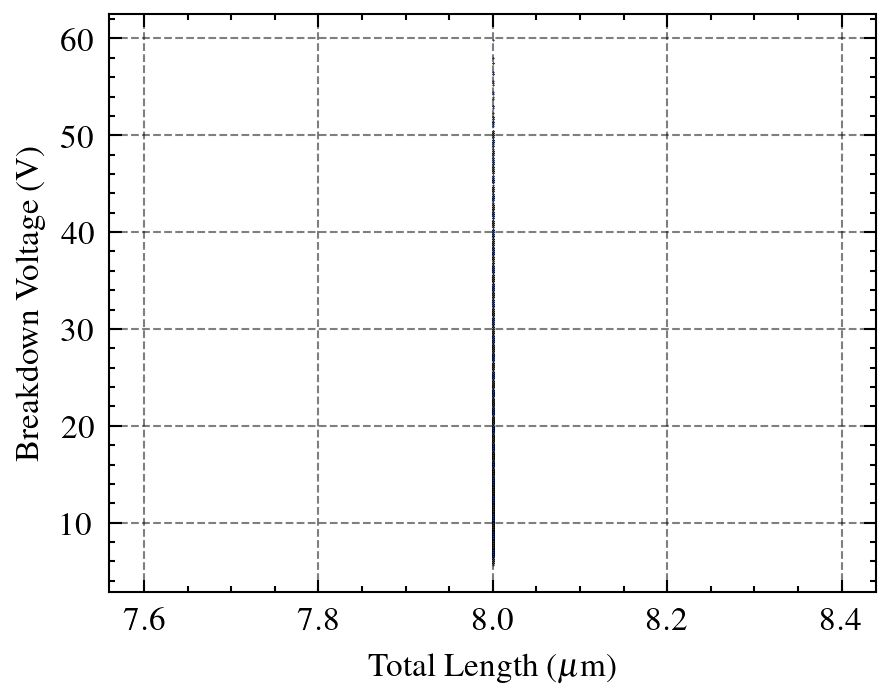

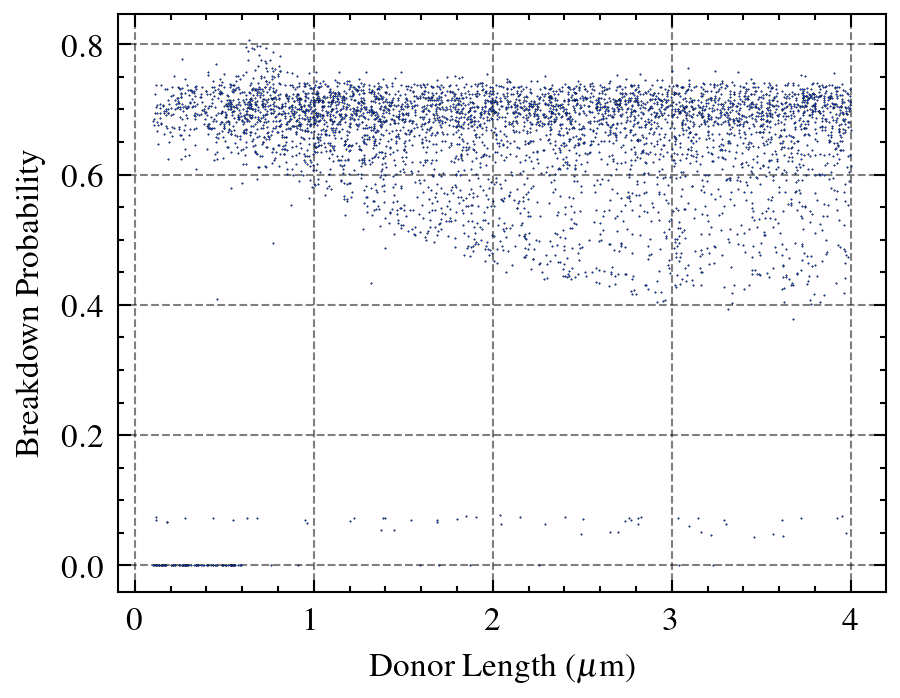

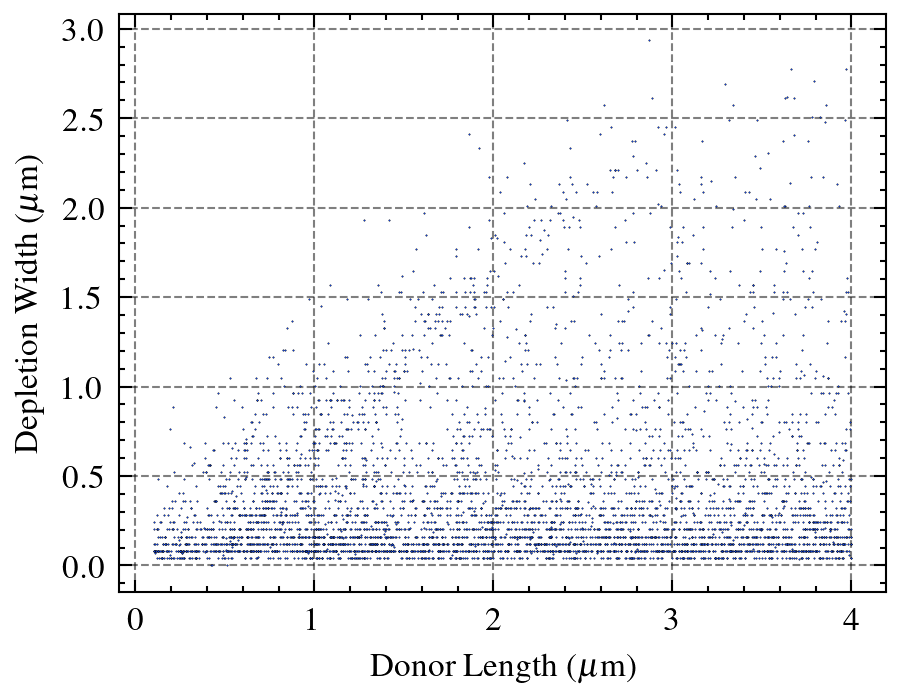

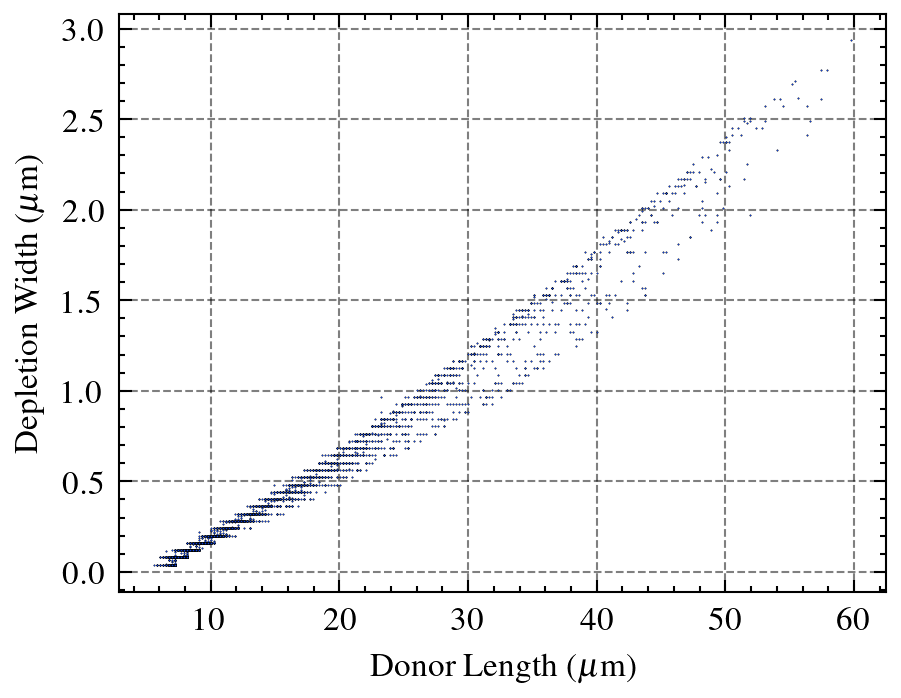

In [119]:
fig, axs = plt.subplots()
axs.scatter(TotalLength, BreakdownVoltage, marker='.', s=0.5, edgecolors='k', linewidths=0.1)
axs.set_xlabel("Total Length ($\mu$m)") 
axs.set_ylabel("Breakdown Voltage (V)")

fig, axs = plt.subplots()
axs.scatter(DonorLength, BreakdownProbability, marker='.', s=0.5, edgecolors='k', linewidths=0.1)
axs.set_xlabel("Donor Length ($\mu$m)")
axs.set_ylabel("Breakdown Probability")

fig, axs = plt.subplots()
axs.scatter(DonorLength, DepletionWidth, marker='.', s=0.5, edgecolors='k', linewidths=0.1)
axs.set_xlabel("Donor Length ($\mu$m)")
axs.set_ylabel("Depletion Width ($\mu$m)")

fig, axs = plt.subplots()
axs.scatter(BreakdownVoltage, DepletionWidth, marker='.', s=0.5, edgecolors='k', linewidths=0.1)
axs.set_xlabel("Donor Length ($\mu$m)")
axs.set_ylabel("Depletion Width ($\mu$m)")
